###
Objective

In this checkpoint, we are going to work on the Titanic data set to predict if a passenger will survive or not using several classification algorithms of supervised learning. We will start by logistic regression, knn, then decision tree and we finalize by random forest.
Instructions

Part 1 Logistic Regression

1. Apply logistic regression. 

2. Use confusion matrix to validate your model. 

3. Another validation matrix for classification is ROC / AUC , do your research on them explain them and apply them in our case

Part 2 KNN

1.  Apply the KNN and predict your model

2. Choose the optimal number of neighbors

Part 3:  Decision tree and random forest

1. Apply decision tree and predict you model

2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

3. Change the decision tree parameters(change at least two parameters), 

4. Calculate the new accuracy and compare it with the previous results. 

5. Use random forest then change the number of estimators

6. Calculate the new accuracy and compare it with the previous result.

Now to finalize your project, make a summary graph which resume all accuracies of each model(logistic regression, knn Decision tree and random forest) to decide which model is the most performant


In [159]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd

titanic = pd.read_csv('titanic-passengers.csv', sep = ';')

In [163]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,B71,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,B71,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,B71,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,S


In [41]:
titanic.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000


In [21]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [11]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)
titanic['Cabin'].fillna('B71', inplace = True)
titanic['Embarked'].fillna( 's', inplace = True)

In [33]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [28]:
titanic.duplicated().sum() # Checking for duplicate values

0

In [44]:
# Feature Selection

titanic.replace({'Sex':{'male': 1, 'female': 0}}, inplace = True)
titanic.replace({'Survived':{'Yes': 1, 'No': 0}}, inplace = True)

x = titanic.drop(['Survived', 'Name', 'Cabin', 'Ticket', 'Embarked'], axis = 1)

y = titanic['Survived']

x.head()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,343,2,1,28.0,0,0,13.0000
1,76,3,1,25.0,0,0,7.6500
2,641,3,1,20.0,0,0,7.8542
3,568,3,0,29.0,0,4,21.0750
4,672,1,1,31.0,1,0,52.0000


In [47]:
# Checking for outliers in the features
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(x['Age']))
outlier = list(set(np.where(z > 3)[0])) # This fetches all the indexes that has an outlier

outlier

#x['Age'] = x['Age'].drop(outlier, axis = 0).reset_index(drop = False) # Dropping the oitliers are necessary here cos they are not far apart

[704, 234, 588, 689, 852, 536, 57]

In [61]:
# Spliting dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 30)


In [103]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(x_train, y_train) # Training the model

lr_predict = lr_model.predict(x_test)
lr_predict_g = lr_model.decision_function(x_test)# Used for plotting logistic regression, ROC and AUC graph
print('Accuracy is :', lr_model.score(x_test, y_test))

Accuracy is : 0.7533632286995515


/home/kali/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


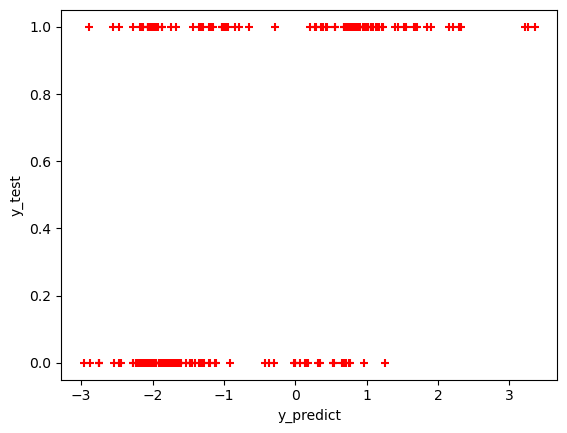

In [127]:
# Visualization
from matplotlib import pyplot as plt

plt.scatter(lr_predict_g, y_test, marker = '+', color = 'red')

plt.ylabel('y_test')
plt.xlabel('y_predict')
plt.show()



<AxesSubplot:xlabel='Actual', ylabel='Predict'>

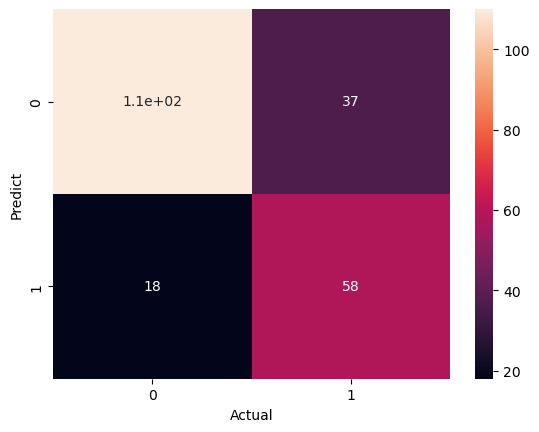

In [105]:
#Confusion Matrix
import seaborn as sns

confusion_matrix = pd.crosstab(lr_predict, y_test,  rownames = ['Predict'], colnames =['Actual'])
sns.heatmap(confusion_matrix, annot = True)

## Receiver Operator Characteristic (ROC)

The ROC graph are points which summarizes confusion matixes of a given model at various major classification thresholds(i.e probability point to use in decision-making) in order to select the threshold that gives the optimal result. The graph is plotted using True positive rate(sensitivity) on the y-axis and False positive rate( 1 - specificity) on the x-axis.

## Area Under The Curve (AUC)
 AUC is the area under the ROC graph. AUC makes it easy to compare ROC curve of a model with ROC of another model in order to pick the model with largerest AUC.
 
 
 


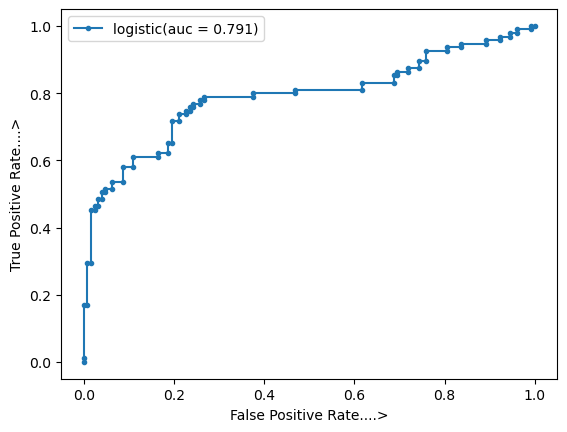

In [122]:
# ROC ana AUC
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr , threshold = roc_curve(y_test, lr_predict_g)
auc_logistic = auc(logistic_fpr, logistic_tpr)
# plt.figure(figsize = (5,5)), dpi = 100)
plt.plot(logistic_fpr, logistic_tpr, marker = '.', label = 'logistic(auc = %0.3f)' % auc_logistic)
plt.xlabel('False Positive Rate....>')
plt.ylabel('True Positive Rate....>')
plt.legend()
plt.show()

In [177]:
# Part2 KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scores = []
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    knn_predict = knn.predict(x_test)
    
    print('Accuracy for k = ', k, 'is: ' , round(accuracy_score(knn_predict, y_test), 2))
    scores.append(round(accuracy_score(knn_predict, y_test), 2))
    
print(scores)

   
    
knn1 = KNeighborsClassifier(n_neighbors = 11)
knn1.fit(x_train, y_train)

knn_predict1 = knn.predict(x_test)
# print('Accuracy is ' , accuracy_score(knn_predict, y_test))

Accuracy for k =  1 is:  0.61
Accuracy for k =  2 is:  0.64
Accuracy for k =  3 is:  0.62
Accuracy for k =  4 is:  0.61
Accuracy for k =  5 is:  0.62
Accuracy for k =  6 is:  0.62
Accuracy for k =  7 is:  0.61
Accuracy for k =  8 is:  0.62
Accuracy for k =  9 is:  0.62
Accuracy for k =  10 is:  0.63
Accuracy for k =  11 is:  0.64
Accuracy for k =  12 is:  0.63
Accuracy for k =  13 is:  0.64
Accuracy for k =  14 is:  0.62
Accuracy for k =  15 is:  0.62
Accuracy for k =  16 is:  0.62
Accuracy for k =  17 is:  0.63
Accuracy for k =  18 is:  0.62
Accuracy for k =  19 is:  0.63
Accuracy for k =  20 is:  0.62
Accuracy for k =  21 is:  0.61
Accuracy for k =  22 is:  0.61
Accuracy for k =  23 is:  0.62
Accuracy for k =  24 is:  0.61
Accuracy for k =  25 is:  0.62
Accuracy for k =  26 is:  0.61
Accuracy for k =  27 is:  0.62
Accuracy for k =  28 is:  0.62
Accuracy for k =  29 is:  0.62
[0.61, 0.64, 0.62, 0.61, 0.62, 0.62, 0.61, 0.62, 0.62, 0.63, 0.64, 0.63, 0.64, 0.62, 0.62, 0.62, 0.63, 0.62, 0

Text(0, 0.5, 'Testing Accuracy')

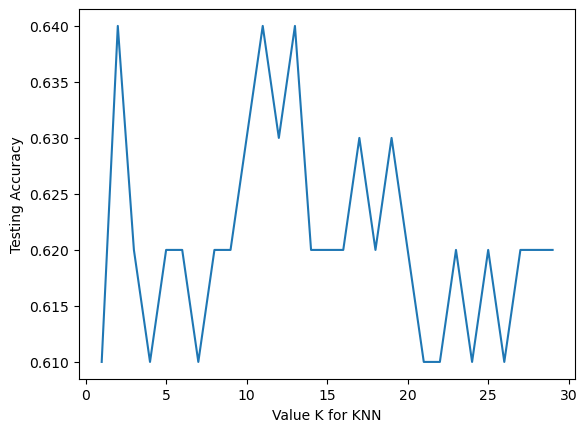

In [146]:
plt.plot(range(1,30), scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

### From the result of the knn iteration, the optimal number of neighbors is 11 as it is the least odd number amongst the list with the maximum accuracy (0.64)

In [173]:
# Predicting the model using decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

tree_model = DecisionTreeClassifier()
tree_model.fit(x_train, y_train)

tree_predict = tree_model.predict(x_test)
print('Decision Tree accurcay is: ', round(accuracy_score(y_test, tree_predict), 2))

Decision Tree accurcay is:  0.77


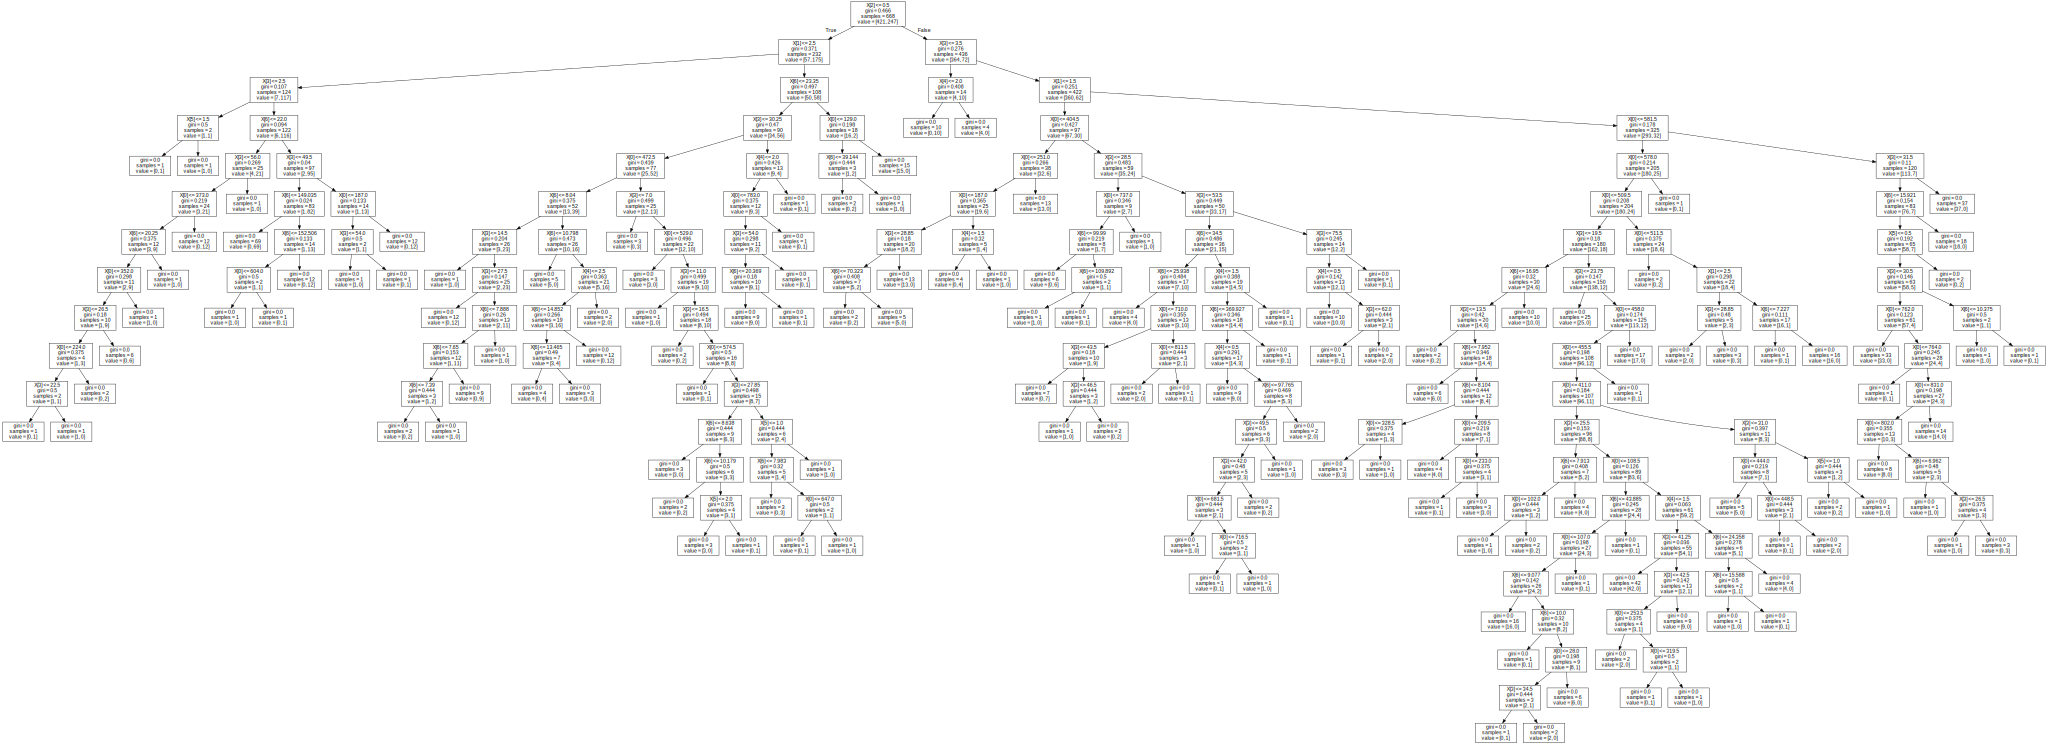

In [161]:
# Decision Tree Visualization
import graphviz

tre_graph = tree.export_graphviz(tree_model, out_file = None)
graph = graphviz.Source(tre_graph)
graph



In [164]:
#Predicting survival with abstract figures

tree_model.predict([[672, 1, 1, 31, 1, 0, 52]])

/home/kali/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [169]:
# Random Forest model using k-fold split

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score as cvs
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 10)
kf = KFold(n_splits = 10, random_state = 80, shuffle = True)
scores = cvs(rf_model, x, y, cv = kf)
print(scores)
print(sum(scores/10))


[0.81111111 0.83146067 0.82022472 0.86516854 0.84269663 0.88764045
 0.82022472 0.76404494 0.85393258 0.7752809 ]
0.8271785268414482
